# GPlayStore Data Analysis

## Import Libraries

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read Data from the Database into pandas

In [2]:
!ls

 googleplaystore.csv		    GPlayStore.ipynb
 googleplaystore_user_reviews.csv   StudentsPerformance.csv
'GPlayStore for GitHub.ipynb'	   'Students Performance in Exams.ipynb'


In [3]:
P_Store = pd.read_csv('./googleplaystore.csv')

In [4]:
PS_Reviews = pd.read_csv('./googleplaystore_user_reviews.csv')

In [5]:
P_Store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Cleaning Data in P_Store DataFrame

In [6]:
P_Store.isnull().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

In [7]:
before_rows = P_Store.shape[0]

In [8]:
P_Store = P_Store.dropna()

In [9]:
after_rows = P_Store.shape[0]
print(after_rows)

9360


In [10]:
before_rows - after_rows

1481

In [11]:
P_Store['Installs'] = P_Store.Installs.str.replace('+','')
P_Store['Installs'] = P_Store.Installs.str.replace(',','')

In [12]:
P_Store['Price'] = P_Store.Price.str.replace('$','')

In [13]:
P_Store['Size'] = P_Store.Size.str.replace('M','')
P_Store['Size'] = P_Store.Size.str.replace('k','000')

In [14]:
P_Store['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [15]:
# replace all content ratings with integers so it cna be considered as a feature for Regression
P_Store['Content Rating'] = P_Store['Content Rating'].str.replace('Everyone 10+','1')
P_Store['Content Rating'] = P_Store['Content Rating'].str.replace('Everyone','0')
P_Store['Content Rating'] = P_Store['Content Rating'].str.replace('Teen','2')
P_Store['Content Rating'] = P_Store['Content Rating'].str.replace('Mature 17+','3')
P_Store['Content Rating'] = P_Store['Content Rating'].str.replace('Adults only 18+','4')
P_Store['Content Rating'] = P_Store['Content Rating'].str.replace('Unrated','5')
P_Store['Content Rating'] = P_Store['Content Rating'].str.replace('+','')

In [16]:
#delete rows that have 'Varies with device' in Size
P_Store = P_Store[~P_Store.Size.str.contains('Varies with device')]

In [17]:
del P_Store['Category']
del P_Store['Current Ver']
del P_Store['Last Updated']
del P_Store['Android Ver']
del P_Store['Type']
del P_Store['Genres']

In [18]:
P_Store.head()

,App,Rating,Reviews,Size,Installs,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19,10000,0,0
1,Coloring book moana,3.9,967,14,500000,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7,5000000,0,0
3,Sketch - Draw & Paint,4.5,215644,25,50000000,0,2
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8,100000,0,0


In [19]:
P_Store['Reviews'] = P_Store['Reviews'].astype(int) 
P_Store['Rating'] = P_Store['Rating'].astype(float) 
P_Store['Size'] = P_Store['Size'].astype(float) 
P_Store['Installs'] = P_Store['Installs'].astype(int) 
P_Store['Content Rating'] = P_Store['Content Rating'].astype(int) 
P_Store['Price'] = P_Store['Price'].astype(float) 

 ## Cleaning Data in PS_Reviews DataFrame

In [20]:
PS_Reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [21]:
before_rows = PS_Reviews.shape[0]
before_rows

64295

In [22]:
PS_Reviews = PS_Reviews.dropna(subset = ['Translated_Review'])
PS_Reviews = PS_Reviews.dropna(subset = ['Sentiment'])
PS_Reviews = PS_Reviews.dropna(subset = ['Sentiment_Polarity'])
PS_Reviews = PS_Reviews.dropna(subset = ['Sentiment_Subjectivity'])

In [23]:
after_rows = PS_Reviews.shape[0]
after_rows

37427

In [24]:
before_rows-after_rows

26868

In [25]:
PS_Reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [26]:
PS_Reviews['Sentiment_Polarity'] = PS_Reviews['Sentiment_Polarity'].astype(float)

In [27]:
unique_apps_review = PS_Reviews['App'].unique()
unique_apps_review.shape

(865,)

In [28]:
P_Store.shape

(7723, 7)

### Delete Apps/Rows in P_Store and PS_Reviews DataFrame since there aren't any reviews for certain apps.

In [29]:
# merge both Dataframes to delete uneeded rows
merged_inner = pd.merge(P_Store, PS_Reviews, how = 'inner')

In [30]:
del merged_inner['Translated_Review']
del merged_inner['Sentiment']

In [31]:
merged_inner.head()

,App,Rating,Reviews,Size,Installs,Price,Content Rating,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,3.9,967,14.0,500000,0.0,0,-0.250,1.000000
1,Coloring book moana,3.9,967,14.0,500000,0.0,0,-0.725,0.833333
2,Coloring book moana,3.9,967,14.0,500000,0.0,0,0.000,0.000000
3,Coloring book moana,3.9,967,14.0,500000,0.0,0,0.500,0.600000
4,Coloring book moana,3.9,967,14.0,500000,0.0,0,-0.800,0.900000


In [32]:
merged_inner.isnull().any()

App                       False
Rating                    False
Reviews                   False
Size                      False
Installs                  False
Price                     False
Content Rating            False
Sentiment_Polarity        False
Sentiment_Subjectivity    False
dtype: bool

In [33]:
merged_inner['App'].unique().shape

(569,)

In [34]:
unique_apps_review.shape

(865,)

###### merged_inner and unique_apps_review still have a differing amount of apps, which shows that not all of the apps in PS_Reviews were in P_Store and vice versa.

### Grouping merged_inner by app to have a MEAN Sentiment Polarity of each app

In [35]:
grouped_apps = merged_inner[['App','Sentiment_Polarity']].groupby('App').mean()
type(grouped_apps)

pandas.core.frame.DataFrame

In [36]:
grouped_apps = grouped_apps.reset_index()

In [37]:
PS_grouped = pd.merge(P_Store,grouped_apps,how = 'inner')

In [38]:
PS_grouped.head()

,App,Rating,Reviews,Size,Installs,Price,Content Rating,Sentiment_Polarity
0,Coloring book moana,3.9,967,14.0,500000,0.0,0,0.152652
1,Coloring book moana,3.9,974,14.0,500000,0.0,0,0.152652
2,Garden Coloring Book,4.4,13791,33.0,1000000,0.0,0,0.268483
3,FlipaClip - Cartoon animation,4.3,194216,39.0,5000000,0.0,0,0.412649
4,Boys Photo Editor - Six Pack & Men's Suit,4.1,654,12.0,100000,0.0,0,0.283509


### Grouping merged_inner by app to have a MEDIAN Sentiment Polarity of each app and combined with PS_grouped

In [39]:
grouped_apps_medSP = merged_inner[['App','Sentiment_Polarity']].groupby('App').median()
type(grouped_apps_medSP)

pandas.core.frame.DataFrame

In [40]:
grouped_apps_medSP = grouped_apps_medSP.reset_index()
grouped_apps_medSP['Sentiment_Polarity_Median'] = grouped_apps_medSP['Sentiment_Polarity']
del grouped_apps_medSP['Sentiment_Polarity']

In [41]:
PS_grouped = pd.merge(PS_grouped,grouped_apps_medSP,how = 'inner')

In [42]:
PS_grouped.head()

,App,Rating,Reviews,Size,Installs,Price,Content Rating,Sentiment_Polarity,Sentiment_Polarity_Median
0,Coloring book moana,3.9,967,14.0,500000,0.0,0,0.152652,0.500000
1,Coloring book moana,3.9,974,14.0,500000,0.0,0,0.152652,0.500000
2,Garden Coloring Book,4.4,13791,33.0,1000000,0.0,0,0.268483,0.300000
3,FlipaClip - Cartoon animation,4.3,194216,39.0,5000000,0.0,0,0.412649,0.392857
4,Boys Photo Editor - Six Pack & Men's Suit,4.1,654,12.0,100000,0.0,0,0.283509,0.341667


### Do the same for Sentiment Subjectivity

In [43]:
grouped_apps_meanSS = merged_inner[['App','Sentiment_Subjectivity']].groupby('App').mean()
grouped_apps_meanSS = grouped_apps_meanSS.reset_index()
PS_grouped = pd.merge(PS_grouped,grouped_apps_meanSS,how = 'inner')

In [44]:
PS_grouped.head()

,App,Rating,Reviews,Size,Installs,Price,Content Rating,Sentiment_Polarity,Sentiment_Polarity_Median,Sentiment_Subjectivity
0,Coloring book moana,3.9,967,14.0,500000,0.0,0,0.152652,0.500000,0.641540
1,Coloring book moana,3.9,974,14.0,500000,0.0,0,0.152652,0.500000,0.641540
2,Garden Coloring Book,4.4,13791,33.0,1000000,0.0,0,0.268483,0.300000,0.523447
3,FlipaClip - Cartoon animation,4.3,194216,39.0,5000000,0.0,0,0.412649,0.392857,0.679226
4,Boys Photo Editor - Six Pack & Men's Suit,4.1,654,12.0,100000,0.0,0,0.283509,0.341667,0.479298


In [45]:
grouped_apps_medSS = merged_inner[['App','Sentiment_Subjectivity']].groupby('App').median()
grouped_apps_medSS = grouped_apps_medSS.reset_index()
grouped_apps_medSS['Sentiment_Subjectivity_Median'] = grouped_apps_medSS['Sentiment_Subjectivity']
del grouped_apps_medSS['Sentiment_Subjectivity']
PS_grouped = pd.merge(PS_grouped,grouped_apps_medSS,how = 'inner')

In [46]:
PS_grouped.head()

,App,Rating,Reviews,Size,Installs,Price,Content Rating,Sentiment_Polarity,Sentiment_Polarity_Median,Sentiment_Subjectivity,Sentiment_Subjectivity_Median
0,Coloring book moana,3.9,967,14.0,500000,0.0,0,0.152652,0.500000,0.641540,0.600000
1,Coloring book moana,3.9,974,14.0,500000,0.0,0,0.152652,0.500000,0.641540,0.600000
2,Garden Coloring Book,4.4,13791,33.0,1000000,0.0,0,0.268483,0.300000,0.523447,0.598413
3,FlipaClip - Cartoon animation,4.3,194216,39.0,5000000,0.0,0,0.412649,0.392857,0.679226,0.702381
4,Boys Photo Editor - Six Pack & Men's Suit,4.1,654,12.0,100000,0.0,0,0.283509,0.341667,0.479298,0.600000


In [47]:
#Check the lowest amount of reviews in an app to see if a sentiment analysis will produce accurate results
PS_grouped.Reviews.min()

46

###### Since lowest # of reviews is 46, we should make the minimum amount of rows to be 100 for best outcomes

In [48]:
before_rows = PS_grouped.shape[0]
PS_grouped = PS_grouped[PS_grouped.Reviews > 99]
PS_grouped.Reviews.min()

114

In [49]:
after_rows = PS_grouped.shape[0]
before_rows - after_rows

1

## Determine the Features to use for Regression Analysis (Question 1)

In [50]:
PS_grouped['Reviews'].min()

114

In [51]:
PS_grouped['Reviews'].describe()

count    8.120000e+02
mean     1.192853e+06
std      4.479416e+06
min      1.140000e+02
25%      7.182000e+03
50%      4.151150e+04
75%      2.031532e+05
max      4.489389e+07
Name: Reviews, dtype: float64

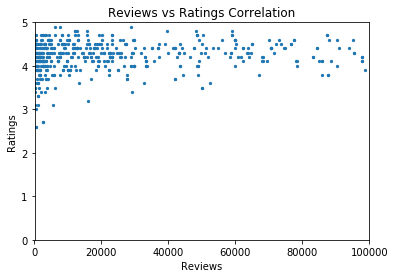

In [52]:
plt.scatter(PS_grouped['Reviews'].values, PS_grouped['Rating'].values, s = 5)
plt.xlabel('Reviews')
plt.ylabel('Ratings')
plt.title('Reviews vs Ratings Correlation')
plt.axis([100,100000,0,5])
plt.show()

In [53]:
np.corrcoef(PS_grouped['Reviews'].values, PS_grouped['Rating'].values)

array([[1.        , 0.16894921],
       [0.16894921, 1.        ]])

These values do not correlate so Reviews will not be part of the features

In [54]:
PS_grouped['Size'].describe()

count       812.000000
mean       4380.833621
std       52740.430911
min           1.200000
25%           9.375000
50%          20.000000
75%          45.250000
max      853000.000000
Name: Size, dtype: float64

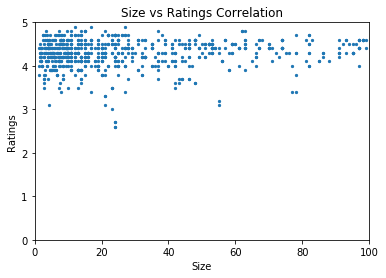

In [55]:
plt.scatter(PS_grouped['Size'].values, PS_grouped['Rating'].values, s = 5)
plt.xlabel('Size')
plt.ylabel('Ratings')
plt.title('Size vs Ratings Correlation')
plt.axis([0,100,0,5])
plt.show()

In [56]:
np.corrcoef(PS_grouped['Size'].values, PS_grouped['Rating'].values)

array([[ 1.        , -0.08196689],
       [-0.08196689,  1.        ]])

These do not correlate either. On to the next potential feature

In [57]:
PS_grouped['Installs'].describe()

count    8.120000e+02
mean     2.590269e+07
std      9.203558e+07
min      1.000000e+03
25%      5.000000e+05
50%      1.000000e+06
75%      1.000000e+07
max      1.000000e+09
Name: Installs, dtype: float64

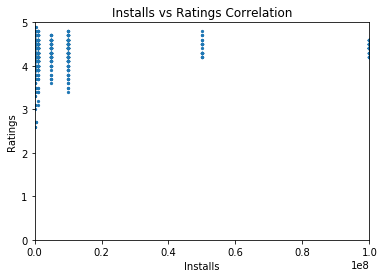

In [58]:
plt.scatter(PS_grouped['Installs'].values, PS_grouped['Rating'].values, s = 5)
plt.xlabel('Installs')
plt.ylabel('Ratings')
plt.title('Installs vs Ratings Correlation')
plt.axis([0,100000000,0,5])
plt.show()

In [59]:
np.corrcoef(PS_grouped['Size'].values, PS_grouped['Rating'].values)

array([[ 1.        , -0.08196689],
       [-0.08196689,  1.        ]])

Installs do not correlate with ratings either.

In [60]:
PS_grouped['Sentiment_Polarity'].describe()

count    812.000000
mean       0.189168
std        0.158706
min       -0.383333
25%        0.069157
50%        0.185979
75%        0.299903
max        1.000000
Name: Sentiment_Polarity, dtype: float64

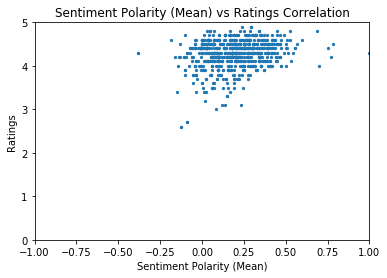

In [61]:
plt.scatter(PS_grouped['Sentiment_Polarity'].values, PS_grouped['Rating'].values, s = 5)
plt.xlabel('Sentiment Polarity (Mean)')
plt.ylabel('Ratings')
plt.title('Sentiment Polarity (Mean) vs Ratings Correlation')
plt.axis([-1,1,0,5])
plt.show()

In [62]:
np.corrcoef(PS_grouped['Sentiment_Polarity'].values, PS_grouped['Rating'].values)

array([[1.        , 0.20745499],
       [0.20745499, 1.        ]])

In [63]:
PS_grouped['Sentiment_Polarity_Median'].describe()

count    812.000000
mean       0.190132
std        0.177185
min       -0.300000
25%        0.040511
50%        0.166667
75%        0.315000
max        1.000000
Name: Sentiment_Polarity_Median, dtype: float64

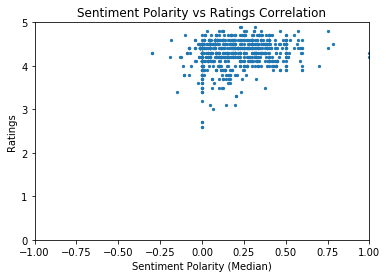

In [64]:
plt.scatter(PS_grouped['Sentiment_Polarity_Median'].values, PS_grouped['Rating'].values, s = 5)
plt.xlabel('Sentiment Polarity (Median)')
plt.ylabel('Ratings')
plt.title('Sentiment Polarity vs Ratings Correlation')
plt.axis([-1,1,0,5])
plt.show()

In [65]:
np.corrcoef(PS_grouped['Sentiment_Polarity_Median'].values, PS_grouped['Rating'].values)

array([[1.        , 0.18862542],
       [0.18862542, 1.        ]])

### Regression Analysis using the features to predict Rating

##### Extracting Features and Target Values into Separate DataFrames

In [66]:
PS_grouped.columns

Index(['App', 'Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Content Rating', 'Sentiment_Polarity', 'Sentiment_Polarity_Median',
       'Sentiment_Subjectivity', 'Sentiment_Subjectivity_Median'],
      dtype='object')

In [67]:
features = ['Sentiment_Polarity','Sentiment_Polarity_Median','Sentiment_Polarity','Sentiment_Polarity_Median']

In [68]:
target = ['Rating']

In [69]:
X = PS_grouped[features]
y = PS_grouped[target]

In [70]:
X.iloc[0]

Sentiment_Polarity           0.152652
Sentiment_Polarity_Median    0.500000
Sentiment_Polarity           0.152652
Sentiment_Polarity_Median    0.500000
Name: 0, dtype: float64

In [71]:
#y

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

In [73]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [74]:
y_prediction = regressor.predict(X_test)
y_prediction

array([[4.23253394],
       [4.30533436],
       [4.26644197],
       [4.11754201],
       [4.34137934],
       [4.28885934],
       [4.31621452],
       [4.2981608 ],
       [4.36317806],
       [4.20693774],
       [4.26704566],
       [4.29604506],
       [4.27655864],
       [4.25941941],
       [4.33450542],
       [4.25655404],
       [4.18735358],
       [4.14541431],
       [4.28627818],
       [4.1837799 ],
       [4.25254106],
       [4.19245925],
       [4.34223427],
       [4.32001784],
       [4.24819181],
       [4.11891375],
       [4.28004679],
       [4.26857252],
       [4.19941011],
       [4.27442011],
       [4.34610564],
       [4.29622637],
       [4.19200087],
       [4.27125388],
       [4.31621452],
       [4.2178955 ],
       [4.20737289],
       [4.25254106],
       [4.3922386 ],
       [4.27950029],
       [4.29888944],
       [4.40827165],
       [4.37633751],
       [4.13471588],
       [4.25600902],
       [4.33572823],
       [4.16957898],
       [4.220

In [75]:
print("Min: ", y_prediction.min())
print("Max: ", y_prediction.max())
print("Mean: ",y_prediction.mean())

Min:  3.9936452760946657
Max:  4.641480147458698
Mean:  4.270467161750242


In [76]:
y_test.describe()

,Rating
count,268.000000
mean,4.300373
std,0.296104
min,2.700000
25%,4.100000
50%,4.300000
75%,4.500000
max,4.900000


In [77]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [78]:
print(RMSE)

0.2927830970916976


### Regression Analysis Using Decision Tree Regressor

In [79]:
regressor = DecisionTreeRegressor(max_depth=9)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [80]:
y_prediction = regressor.predict(X_test)
y_prediction

array([3.8       , 4.36153846, 3.8       , 2.7       , 4.36153846,
       4.36153846, 4.1       , 4.36153846, 4.36153846, 4.22      ,
       4.36153846, 4.36153846, 4.6       , 4.15714286, 4.36153846,
       4.2       , 4.45      , 4.1       , 4.36153846, 4.55555556,
       4.20333333, 4.22      , 4.36153846, 4.36153846, 4.15714286,
       4.2       , 4.24285714, 4.15714286, 4.4       , 4.36153846,
       4.26216216, 4.2       , 4.4       , 4.36153846, 4.1       ,
       4.20333333, 4.20333333, 4.20333333, 4.36153846, 4.36153846,
       4.36153846, 4.55714286, 4.36153846, 4.7       , 4.25      ,
       4.36153846, 3.8       , 3.8       , 4.55555556, 4.36153846,
       4.26216216, 4.36153846, 4.2       , 4.26      , 4.36153846,
       4.4       , 4.15714286, 4.36153846, 4.1       , 4.4       ,
       4.8       , 4.25      , 2.7       , 4.8       , 4.36153846,
       4.22      , 4.36153846, 4.3       , 4.36153846, 4.36153846,
       4.4       , 4.55555556, 4.6       , 4.26216216, 4.24285

In [81]:
print("Min: ", y_prediction.min())
print("Max: ", y_prediction.max())
print("Mean: ",y_prediction.mean())

Min:  2.7
Max:  4.8
Mean:  4.276462519596849


In [82]:
y_test.describe()

,Rating
count,268.000000
mean,4.300373
std,0.296104
min,2.700000
25%,4.100000
50%,4.300000
75%,4.500000
max,4.900000


In [83]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [84]:
print(RMSE)

0.30565474819566274
